# Figure 14. Scatter plot of research centres by number of projects and total funding obtained during the whole analysed period (1993-2019)

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, 0, regex=True)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_proyectos.csv"

#### Define function to clean projects data

In [48]:
def prepare_data(data):
    mini = data[["ID proyecto","Financiación", "Organismo"]] 
    mini = mini.groupby(['ID proyecto','Organismo'])["Financiación"].apply(list).reset_index(name='Financiación')
    new_fins = [fin[0] for fin in mini["Financiación"]]
    mini["Financiación"] = new_fins
    grouped = mini.groupby("Organismo", as_index=False)
    df2 = grouped.agg({'Financiación':['count', 'sum']})
    df2.columns = ["organismo", "count", "funding"]
    df2.set_index("organismo")
    df2 = df2.sort_values(by=['count'], ascending= False)
    df2 = df2.reset_index(drop=True)
    acronimos = read_csv("data/Universidades-Table 1.csv")
    acronimos = acronimos[['Insitución', 'Acrónimo']]
    acronimos['Insitución'] = acronimos['Insitución'].str.upper()
    acronimos['Insitución'] = acronimos['Insitución'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    acronimos['Insitución'] = acronimos['Insitución'].str.upper()
    acronimos = acronimos.rename(columns={"Insitución": "organismo", "Acrónimo": "acronimo"})
    df_def = pd.merge(df2, acronimos, on='organismo', how='outer', validate="one_to_many")
    return df_def, acronimos

#### Run program

In [49]:
proyectos = read_csv(file_path)
df, acr = prepare_data(proyectos)

In [51]:
df

,organismo,count,funding,acronimo
0,UNIVERSIDAD DE BARCELONA,33.0,1783391.0,UB
1,UNIVERSIDAD COMPLUTENSE DE MADRID,30.0,1321786.0,UCM
2,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...,25.0,1131889.0,CSIC
3,UNIVERSIDADE DE SANTIAGO DE COMPOSTELA,23.0,957839.0,NaN
4,UNIVERSIDAD DE GRANADA,21.0,812610.0,UGR
...,...,...,...,...
133,UNIVERSITAT DE VALENCIA,NaN,NaN,UV
134,TELEFONICA I+D,NaN,NaN,TID
135,UNIVERSITE PARIS 8,NaN,NaN,UP8
136,UNIVERSIDAD DE ALMERIA,NaN,NaN,UAL


#### Print graph

<Figure size 432x288 with 0 Axes>

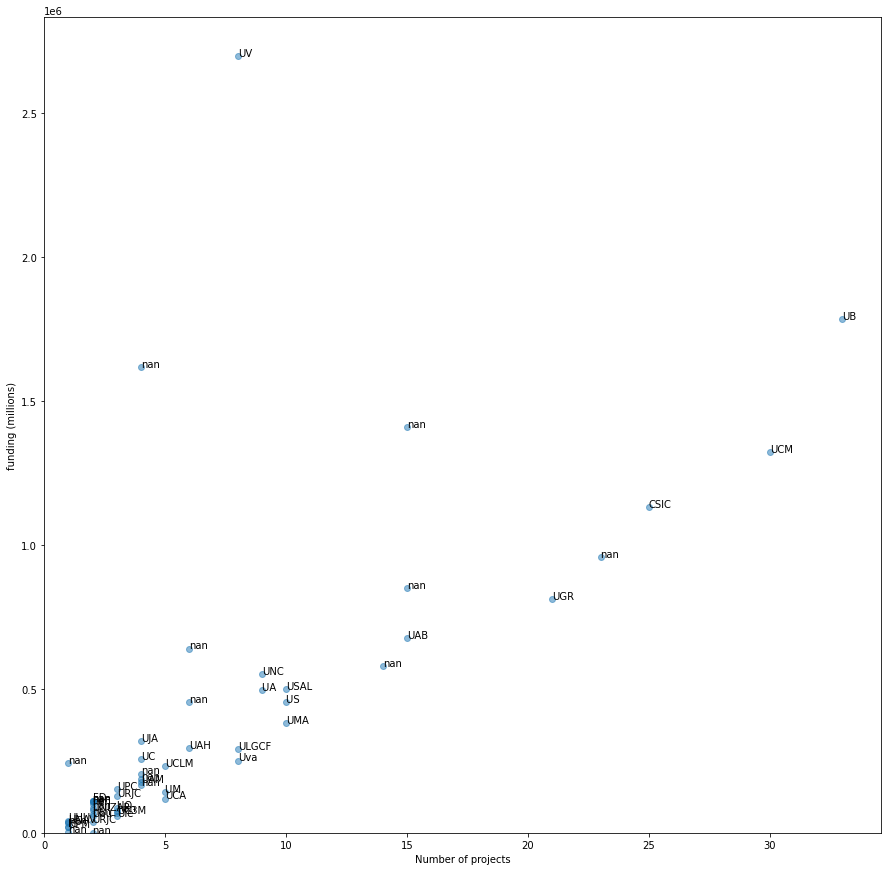

In [52]:
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(df["count"], df["funding"], alpha=0.5)
ax.set(ylabel="funding (millions)", xlabel="Number of projects")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

n = df["acronimo"]
for i, txt in enumerate(n):
    ax.annotate(txt, (df["count"][i], df["funding"][i]))

plt.show()